In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.rcParams['figure.figsize'] = (15, 10)

In [9]:
customers_df = pd.read_csv('./data/olist_customers_dataset.csv')
orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
products_df = pd.read_csv('./data/olist_products_dataset.csv', usecols=['product_id', 'product_category_name', 'product_weight_g'])
sellers_df = pd.read_csv('./data/olist_sellers_dataset.csv')
order_payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')
product_translation_df = pd.read_csv('./data/product_category_name_translation.csv')

In [10]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
updated_product_df = pd.merge(products_df, product_translation_df, on='product_category_name')
updated_product_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)
updated_product_df.drop('product_category_name', axis=1, inplace=True)

In [12]:
def get_part_of_day(hour):
    return (
        "Morning" if 5 <= hour <= 11
        else
        "Afternoon" if 12 <= hour <= 17
        else
        "Evening" if 18 <= hour <= 22
        else
        "Night"
    )

In [27]:
purchase_time = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['purchase_date'] = purchase_time.dt.to_period('M').astype('str')
orders_df['purchase_year'] = purchase_time.dt.year
orders_df['purchase_month'] = purchase_time.dt.month_name()
orders_df['purchase_month_number'] = purchase_time.dt.month
orders_df['purchase_day'] = purchase_time.dt.day_name()
orders_df['purchase_hour'] = purchase_time.dt.hour
orders_df['purchase_timeofday'] = orders_df['purchase_hour'].apply(get_part_of_day)

orders_df['purchase_date'] = orders_df['purchase_date'].str.replace('-','')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,purchase_year,purchase_month,purchase_day,purchase_hour,purchase_timeofday,purchase_month_number
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,201710,2017,October,Monday,10,Morning,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,201807,2018,July,Tuesday,20,Evening,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,201808,2018,August,Wednesday,8,Morning,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,201711,2017,November,Saturday,19,Evening,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,201802,2018,February,Tuesday,21,Evening,2


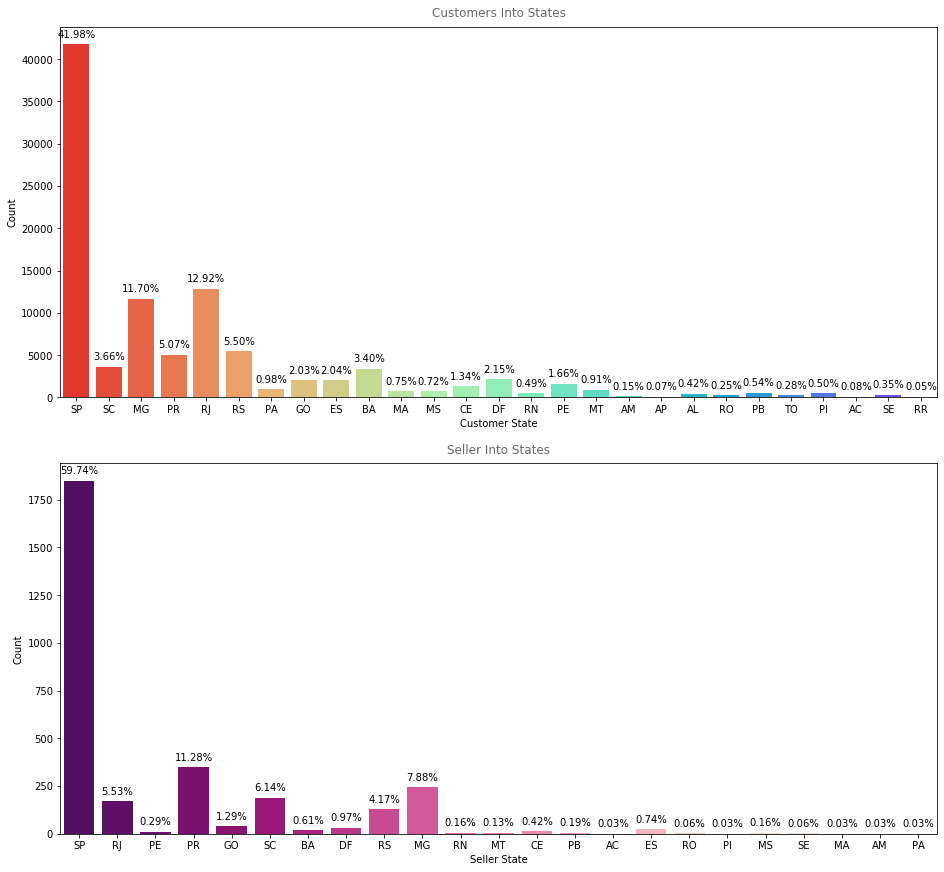

In [17]:
fig = plt.figure(constrained_layout=True, figsize=(13, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

sns.countplot(x=customers_df['customer_state'], ax=ax1, palette='rainbow_r')
total = len(customers_df['customer_state'])
for p in ax1.patches:
    ax1.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set_title('Customers Into States', size=12, color='dimgrey', pad=10)
ax1.set_xlabel('Customer State')
ax1.set_ylabel('Count')

sns.countplot(x=sellers_df['seller_state'], ax=ax2, palette='RdPu_r')
total = len(sellers_df['seller_state'])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax2.set_title('Seller Into States', size=12, color='dimgrey', pad=10)
ax2.set_xlabel('Seller State')
ax2.set_ylabel('Count')

Text(0, 0.5, 'Count')

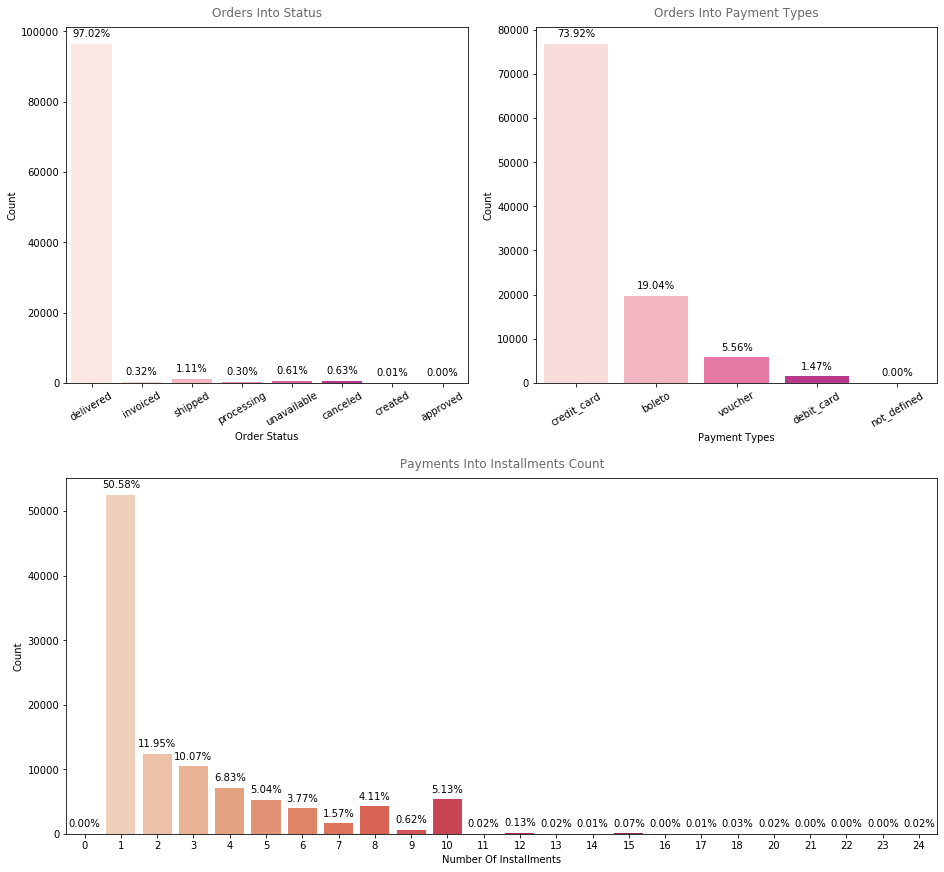

In [18]:
fig = plt.figure(constrained_layout=True, figsize=(13, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.countplot(x=orders_df['order_status'], ax=ax1 ,palette='RdPu')
total = len(orders_df['order_status'])
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)
for p in ax1.patches:
    ax1.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set_title('Orders Into Status', size=12, color='dimgrey', pad=10)
ax1.set_xlabel('Order Status')
ax1.set_ylabel('Count')

sns.countplot(x=order_payments_df['payment_type'], ax=ax2, palette='RdPu')
total = len(order_payments_df['payment_type'])
for tick in ax2.get_xticklabels():
    tick.set_rotation(30)
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax2.set_title('Orders Into Payment Types', size=12, color='dimgrey', pad=10)
ax2.set_xlabel('Payment Types')
ax2.set_ylabel('Count')

sns.countplot(x=order_payments_df['payment_installments'], ax=ax3, palette='rocket_r')
total = len(order_payments_df['payment_installments'])
for p in ax3.patches:
    ax3.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax3.set_title('Payments Into Installments Count', size=12, color='dimgrey', pad=10)
ax3.set_xlabel('Number Of Installments')
ax3.set_ylabel('Count')

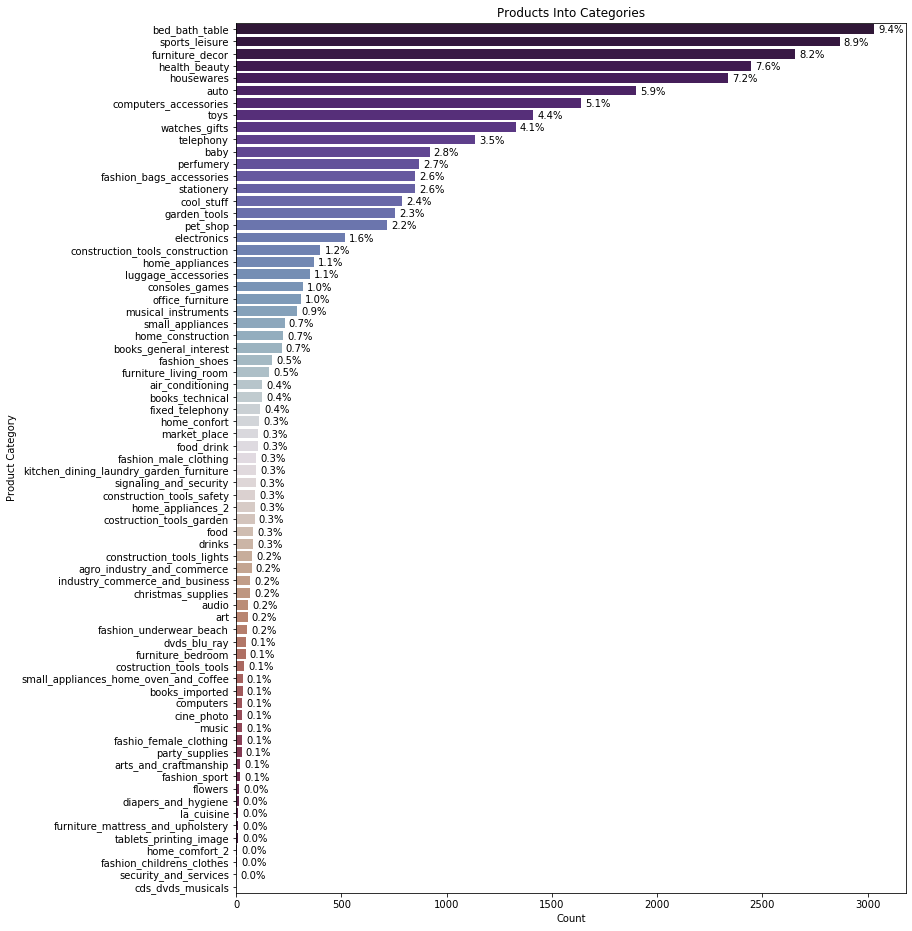

In [21]:
fig = plt.figure(figsize=(12, 16))
ax = sns.countplot(y=updated_product_df['product_category'], palette='twilight_shifted',
                   order = updated_product_df['product_category'].value_counts().index)
total = len(updated_product_df['product_category'])
for p in ax.patches:
    x = (p.get_width() + 80)
    y = (p.get_y() + p.get_height()/2) + 0.9
    ax.annotate('{:.1f}%'.format(100 * p.get_width()/total), (x,y),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Products Into Categories')
plt.ylabel('Product Category')
plt.xlabel('Count')

plt.savefig('Products')

Text(0, 0.5, 'Count')

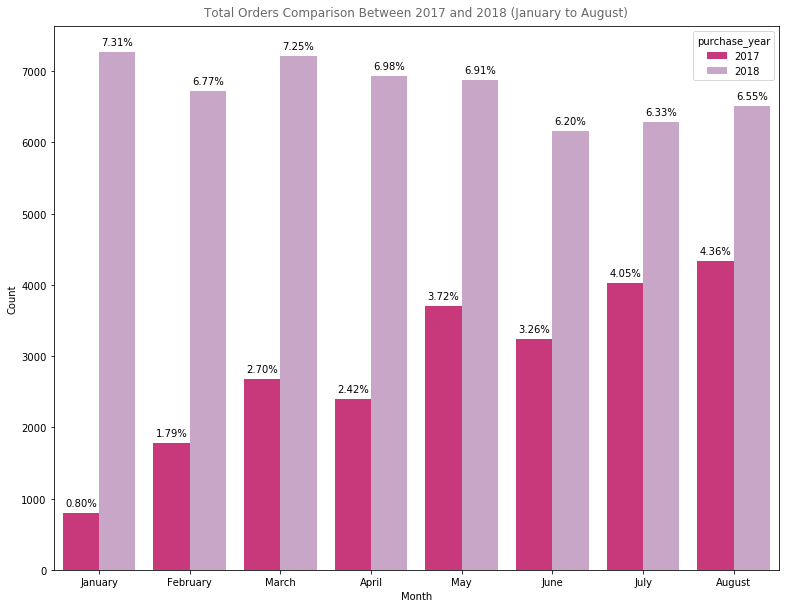

In [37]:
fig = plt.figure(figsize=(13, 10))
df_orders_compare = orders_df.query('purchase_year in (2017, 2018) & purchase_month_number <= 8')
month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
ax = sns.countplot(x=df_orders_compare['purchase_month'], palette='PuRd_r',
                   hue=df_orders_compare['purchase_year'], order=month_label)
total = len(orders_df['purchase_month'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12, color='dimgrey', pad=10)
# ax.set_xticklabels(month_label)
plt.xlabel('Month')
plt.ylabel('Count')

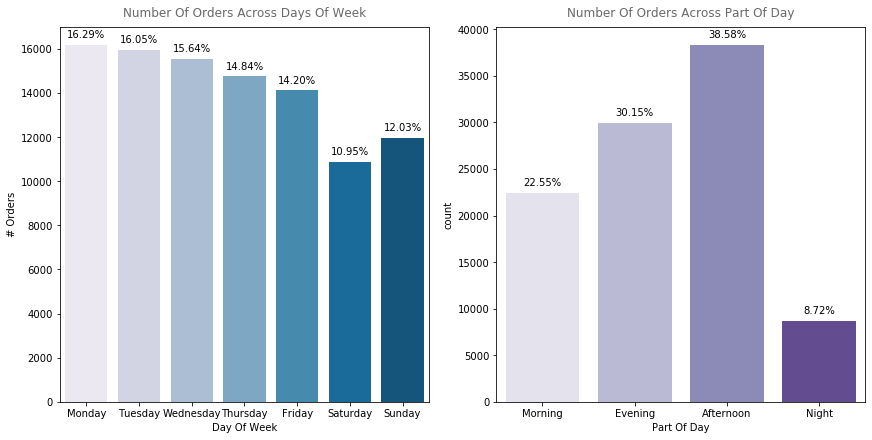

In [48]:
fig = plt.figure(constrained_layout=True, figsize=(12, 6))

# Axis definition
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

day_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=orders_df['purchase_day'], ax=ax1, palette='PuBu', order=day_label)
total = len(orders_df['purchase_day'])
for p in ax1.patches:
    ax1.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set_title('Number Of Orders Across Days Of Week', size=12, color='dimgrey', pad=10)
ax1.set_xlabel('Day Of Week')
ax1.set_ylabel('# Orders')

sns.countplot(x=orders_df['purchase_timeofday'], ax=ax2, palette='Purples')
total = len(orders_df['purchase_timeofday'])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax2.set_title('Number Of Orders Across Part Of Day', size=12, color='dimgrey', pad=10)
ax2.set_xlabel('Part Of Day')
ax3.set_ylabel('# Orders')

plt.savefig('day.png')

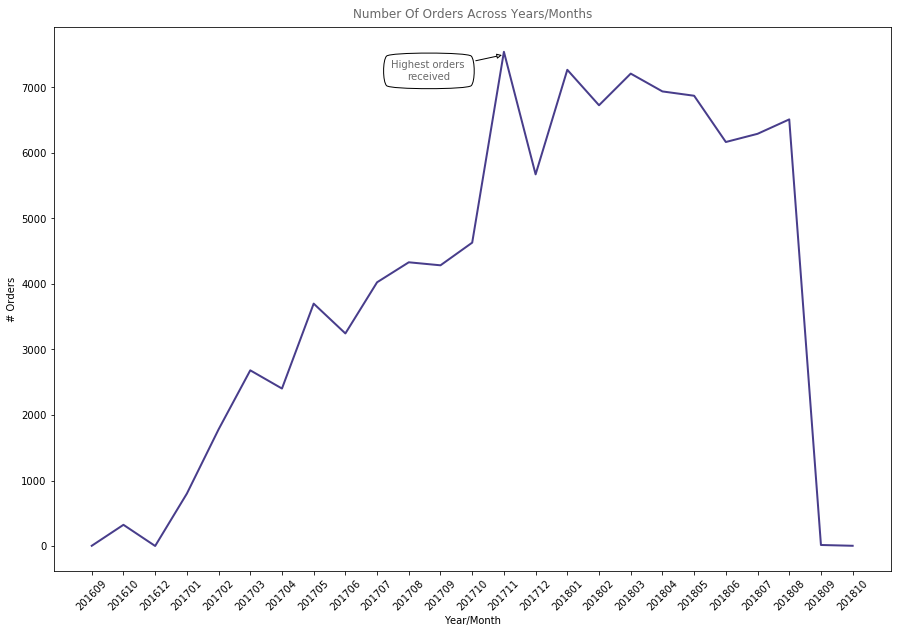

In [49]:
grouped_data_date = orders_df.groupby(['purchase_date']).count()
ax = sns.lineplot(x=grouped_data_date.index, y=grouped_data_date['order_id'], color='darkslateblue', linewidth=2)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
plt.title('Number Of Orders Across Years/Months', size=12, color='dimgrey', pad=10)
plt.xlabel('Year/Month')
plt.ylabel('# Orders')

plt.savefig('grouth.png')